# Импорт библиотек

Стандартные библиотеки

In [73]:
import os
import sys
from tqdm import tqdm

import pandas as pd
import numpy as np
from numpy import array, linspace, radians, degrees, sqrt
import matplotlib.pyplot as plt

Частные библиотеки

In [74]:
from airfoil import Airfoil

# Моделирование профиля 

## BMSTU

In [75]:
airfoil_bmstu = Airfoil('BMSTU', 30)

Определение характеристик профиля необходимых для построения

In [76]:
airfoil_bmstu.xg_b = 0.4

airfoil_bmstu.r_inlet_b = 0.06
airfoil_bmstu.r_outlet_b = 0.03

airfoil_bmstu.g_ = 0.5

airfoil_bmstu.g_inlet = radians(20)
airfoil_bmstu.g_outlet = radians(10)

airfoil_bmstu.e = radians(110)

Определение точек профиля

In [77]:
airfoil_bmstu.solve()

"solve" elapsed 0.0004 seconds


"properties" elapsed 0.5199 seconds


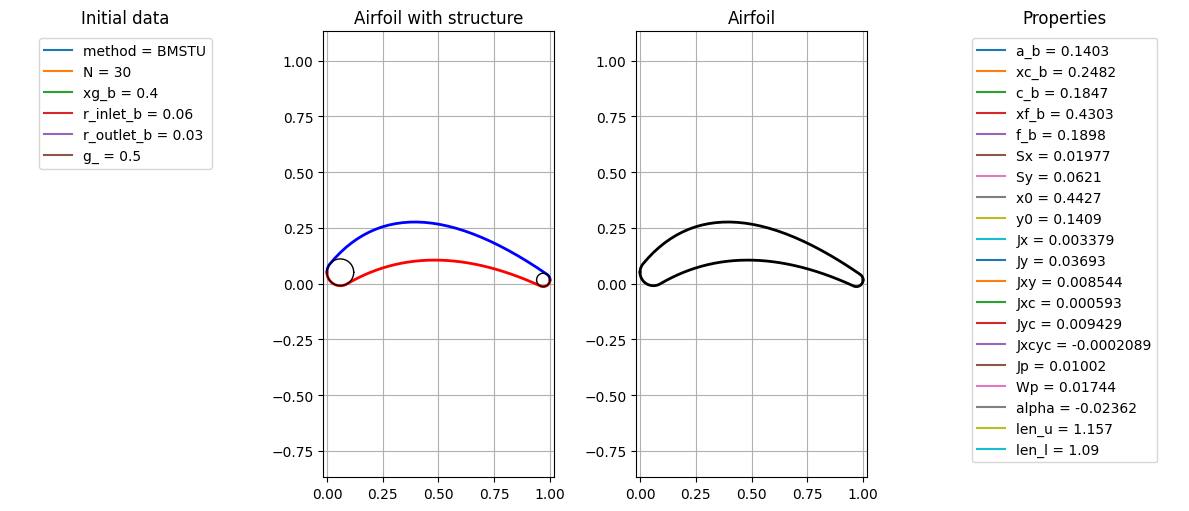

In [78]:
airfoil_bmstu.show()

## NACA

In [79]:
airfoil_naca = Airfoil('NACA')

Определение характеристик профиля необходимых для построения

In [80]:
airfoil_naca.c_b = 0.24
airfoil_naca.f_b = 0.05
airfoil_naca.xf_b = 0.3

In [81]:
airfoil_naca.solve()

"solve" elapsed 0.0013 seconds


"properties" elapsed 0.4159 seconds


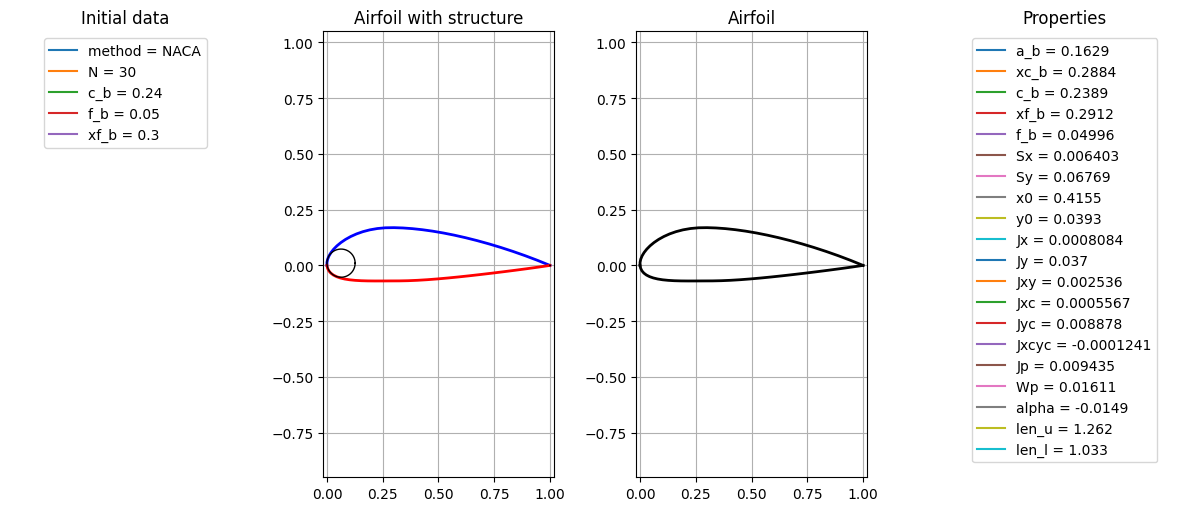

In [82]:
airfoil_naca.show()

## MYNK

In [83]:
airfoil_mynk = Airfoil('MYNK', 20)

Определение характеристик профиля необходимых для построения

In [84]:
airfoil_mynk.h = 0.1

In [85]:
airfoil_mynk.solve()

"solve" elapsed 0.0009 seconds


"properties" elapsed 0.4565 seconds


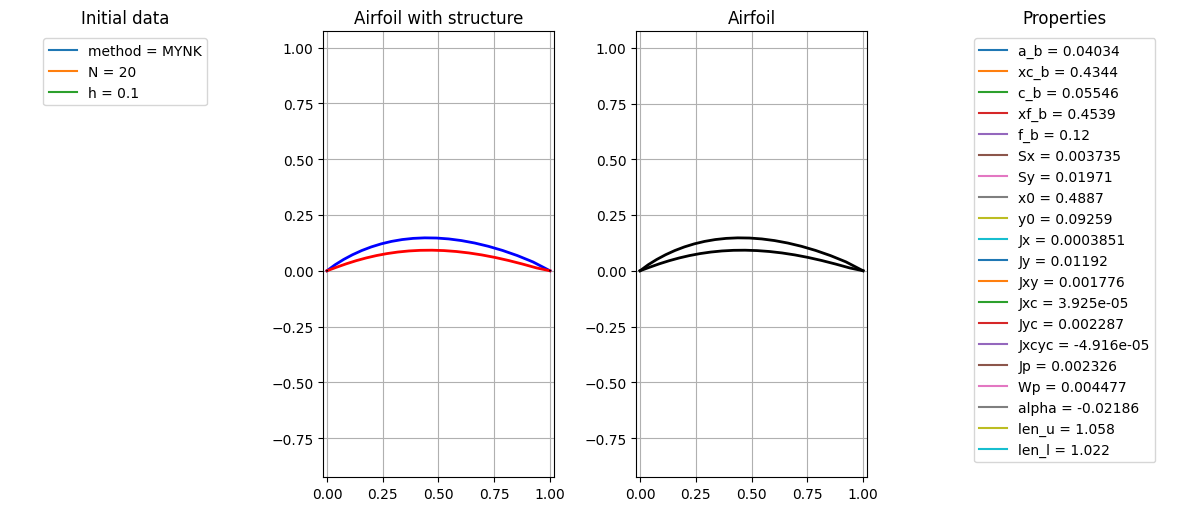

In [86]:
airfoil_mynk.show()

## PARSEC

In [87]:
airfoil_parsec = Airfoil('PARSEC', 100)

Определение характеристик профиля необходимых для построения

In [88]:
airfoil_parsec.r_inlet_b = 0.01
airfoil_parsec.f_b_u, airfoil_parsec.f_b_l = (0.35, 0.055), (0.45, -0.006)
airfoil_parsec.d2y_dx2_u, airfoil_parsec.d2y_dx2_l = -0.35, -0.2
airfoil_parsec.theta_outlet_u, airfoil_parsec.theta_outlet_l = radians(-6), radians(0.05)

In [89]:
airfoil_parsec.solve()

"solve" elapsed 0.0006 seconds


"properties" elapsed 0.3638 seconds


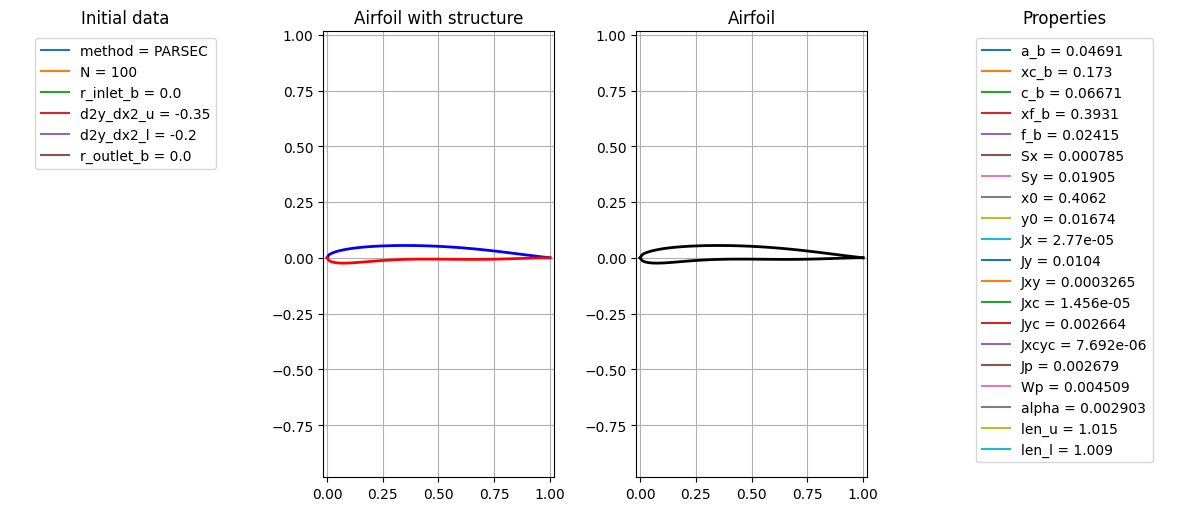

In [90]:
airfoil_parsec.show()

## BEZIER

In [91]:
airfoil_bezier = Airfoil('BEZIER', 30)

Определение характеристик профиля необходимых для построения

In [92]:
airfoil_bezier.u = ((0.0, 0.0), (0.05, 0.100), (0.35, 0.200), (1.0, 0.0))
airfoil_bezier.l = ((0.0, 0.0), (0.05, -0.10), (0.35, -0.05), (0.5, 0.0), (1.0, 0.0))

In [93]:
airfoil_bezier.solve()

"solve" elapsed 0.0003 seconds


"properties" elapsed 0.4223 seconds


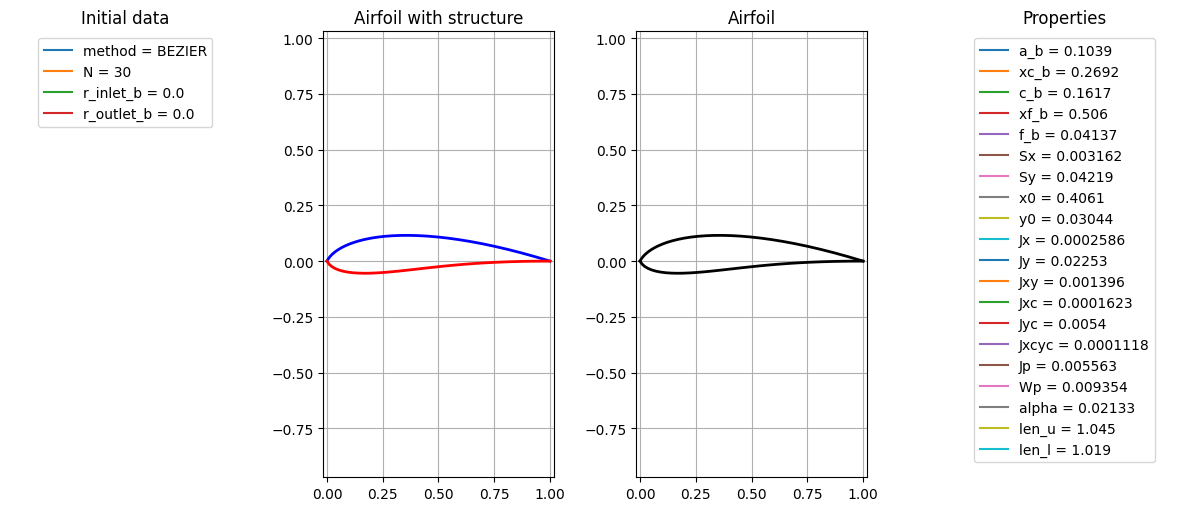

In [94]:
airfoil_bezier.show()

## MANUAL

In [95]:
airfoil_manual = Airfoil('MANUAL', 33)

Определение характеристик профиля необходимых для построения

In [96]:
airfoil_manual.u = ((0.0, 0.0), (0.10, 0.100), (0.40, 0.15), (0.5, 0.15), (0.75, 0.1), (1.0, 0.0))
airfoil_manual.l = ((0.0, 0.0), (0.05, -0.05), (0.35, -0.05), (0.5, 0.0), (1.0, 0.0))
airfoil_manual.deg = 3

In [97]:
airfoil_manual.solve()

"solve" elapsed 0.0006 seconds


"properties" elapsed 0.5289 seconds


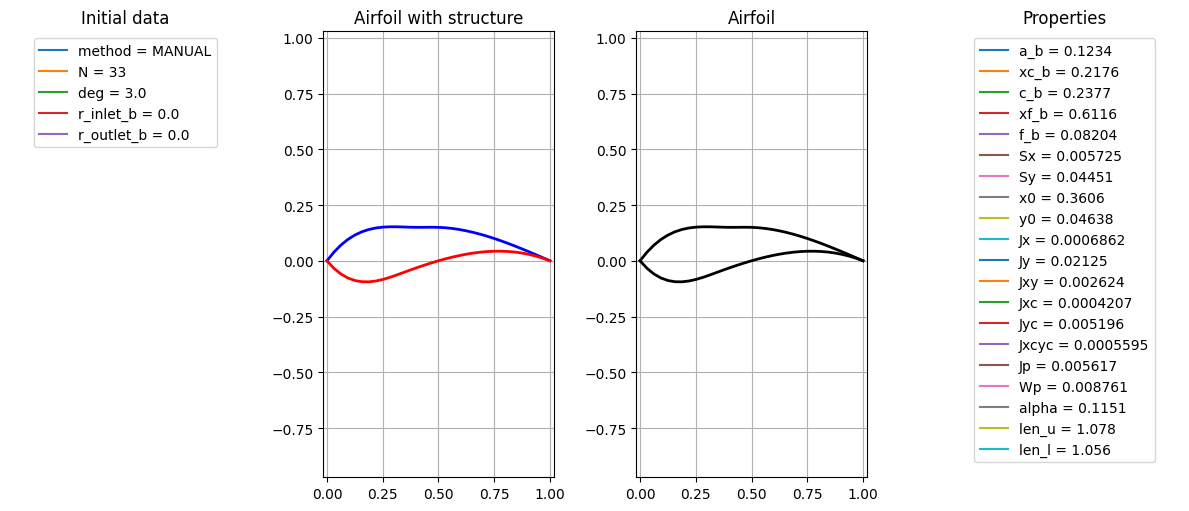

In [98]:
airfoil_manual.show()

# Обтекание профиля

In [99]:
x, y = airfoil_bmstu.to_array(duplicates=False).T

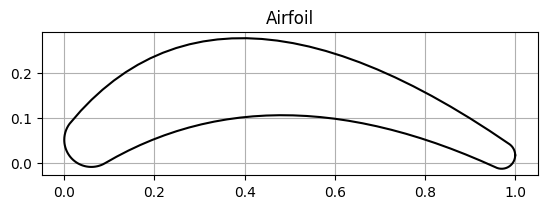

In [100]:
fig, ax = plt.subplots()
ax.set_aspect(1)
plt.title('Airfoil')
plt.grid()
plt.plot(x, y, color=(0, 0, 0))
plt.show()

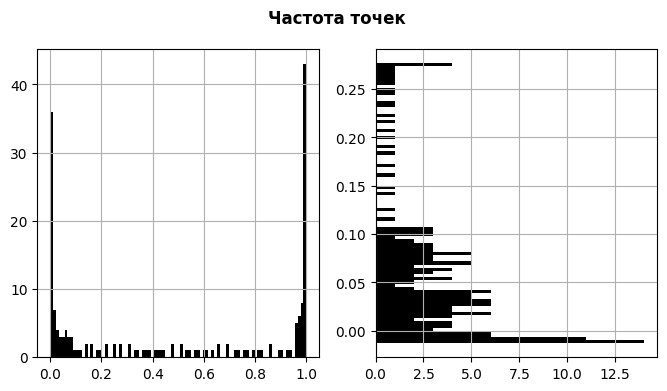

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle('Частота точек', fontweight='bold')
for i, arr in enumerate((x, y)):
    axs[i].grid()
    axs[i].hist(arr, bins=len(arr)//2, color='black', orientation='vertical' if i==0 else 'horizontal')
plt.show()

In [130]:
def get_panel_centers(x, y):
    """Определение серединных точек"""
    xc = (x[1:] + x[:-1]) / 2
    yc = (y[1:] + y[:-1]) / 2
    return xc, yc

def get_panel_normals(x, y):
    """"""
    # расстояния по соответствующим осям между соседними точками
    dx, dy = x[1:] - x[:-1], y[1:] - y[:-1] 

    # длины соседних расстояний между точками
    l = sqrt(dx**2 + dy**2)

    # cos, sin
    c, s = dx / l, dy / l

    return s, -c

def u(xy: tuple, vortexs, bounds: tuple = (1, 1)):
    X, Y = xy
    ux, uy = np.ones_like(X) * bounds[0], np.ones_like(Y) * bounds[1]

    for i, j, k in vortexs:
        R = ((X-i)**2 + (Y-j)**2)
        ux += -k * (Y-j) / R
        uy += k * (X-i) / R

    return ux, uy

In [131]:
xc, yc = get_panel_centers(x, y)
xn, yn = get_panel_normals(x, y)

In [169]:
dis = 500
x_box_lim = (-0.2, 1.2)
y_box_lim = (-0.5, 0.5)

vortexs = array((x, y, np.random.randn(len(x))/3)).T
bounds = (20, 15)

In [170]:
ux, uy = u((xc, yc), vortexs, bounds=bounds)
projection = xn*ux + yn*uy

In [171]:
X, Y = np.meshgrid(linspace(*x_box_lim, dis), linspace(*y_box_lim, dis))
ux, uy = u((X, Y), vortexs, bounds=bounds)

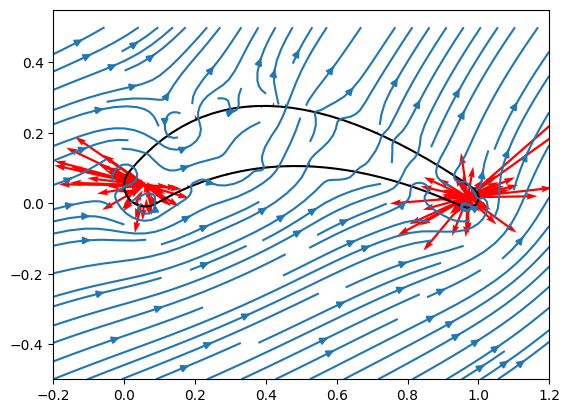

In [172]:
plt.plot(x,y, color='black')
plt.quiver(xc,yc,
           projection*xn, projection*yn,
           color='red')
plt.streamplot(X, Y, ux, uy)
plt.show()